In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

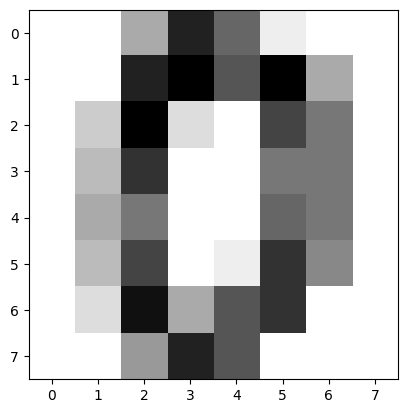

In [5]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

# CNN에서는 원본 이미지(8x8) 형태로 활용
X = digits.images   # (1797, 8, 8)
y = digits.target

In [6]:
# CNN에 넣기 위해 (샘플, 8, 8, 1)로 shape 변환
X = X.reshape(-1, 8, 8, 1)

# 픽셀 정규화(0~1사이 값)
X = X.astype('float32') / 16.0

In [7]:
# 레이블을 원-핫 인코딩(One-Hot Encoding)으로 변환
# 예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_categorical = to_categorical(y, num_classes=10)

In [8]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

훈련 데이터 형태: (1437, 8, 8, 1)
테스트 데이터 형태: (360, 8, 8, 1)


In [9]:
# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466 (76.04 KB)

 Trainable params: 19,466 (76.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2564 - loss: 2.1976 - val_accuracy: 0.8368 - val_loss: 1.6119
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7261 - loss: 1.4042 - val_accuracy: 0.9479 - val_loss: 0.6087
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.6372 - val_accuracy: 0.9792 - val_loss: 0.2838
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9082 - loss: 0.4291 - val_accuracy: 0.9757 - val_loss: 0.1957
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8986 - loss: 0.3334 - val_accuracy: 0.9757 - val_loss: 0.1627
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9378 - loss: 0.2428 - val_accuracy: 0.9896 - val_loss: 0.1112
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9378 - loss: 0.2206 - val_accuracy: 0.9861 - val_loss: 0.1094
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9332 - loss: 0.2079 - val_accuracy: 0.9861 - val_loss:

In [12]:
# 예측
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [13]:
# 학습 곡선
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

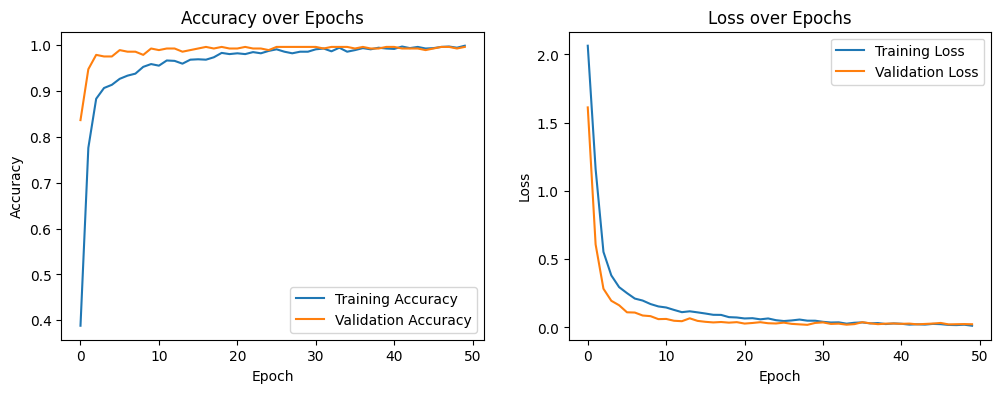

In [14]:
# 학습 과정 시각화 (정확도 및 손실)
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

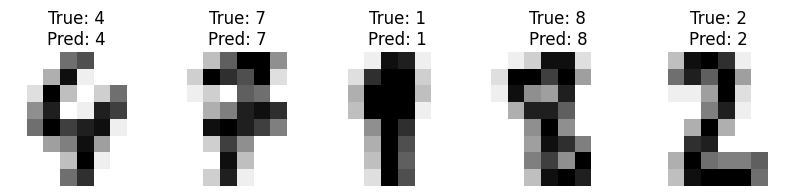

In [15]:
# 예측 결과 중 일부 시각화
n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    image = X_test[i].reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"True: {y_test_class[i]}\nPred: {y_pred_class[i]}")
    plt.axis('off')
plt.show()

In [16]:
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.95      0.96        37
           2       0.97      0.94      0.96        35
           3       0.97      0.95      0.96        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      1.00      0.99        35
           9       0.92      1.00      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  2]
 [ 0  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 35  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0